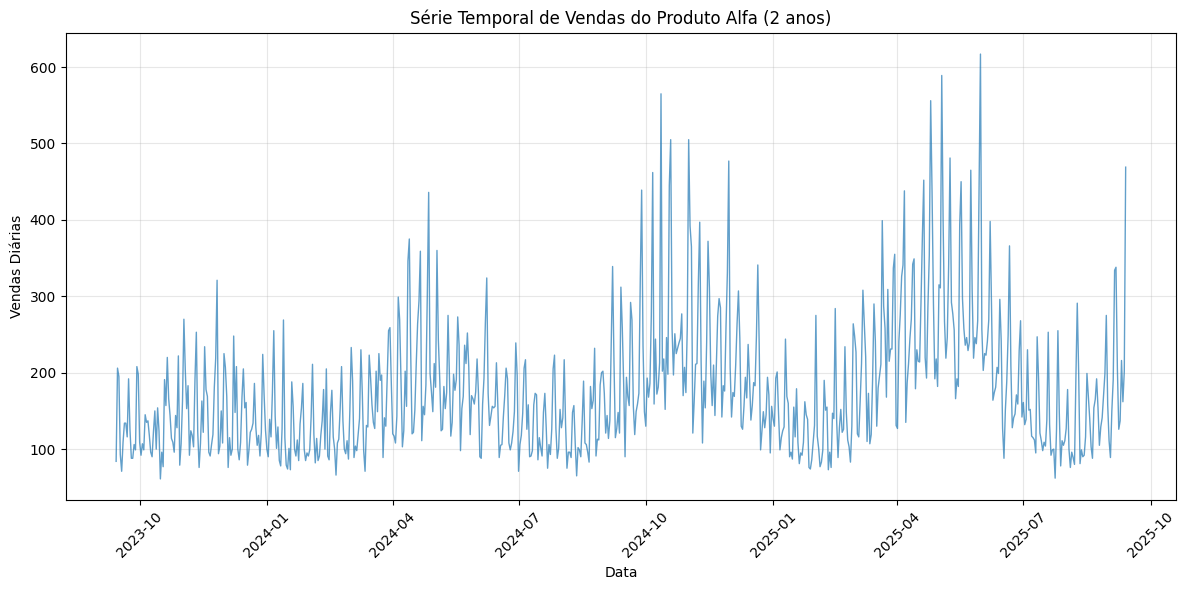

Dataset gerado com sucesso!
Período: 2023-09-14 00:00:00 até 2025-09-13 00:00:00
Total de registros: 731
Valores missing: 19
Outliers: 8


/tmp/ipykernel_174143/3568448057.py:92: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df.loc[mask, 'em_promocao'] = np.nan
/tmp/ipykernel_174143/3568448057.py:95: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df.loc[mask, 'feriado_nacional'] = np.nan


In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import pandas as pd

np.random.seed(42)

start_date = datetime.now() - timedelta(days=730)
end_date = datetime.now()
dates = pd.date_range(start=start_date, end=end_date, freq='D')

feriados = {
    '2024-01-01', '2024-02-13', '2024-03-29', '2024-04-21', '2024-05-01',
    '2024-09-07', '2024-10-12', '2024-11-02', '2024-11-15', '2024-12-25',
    '2023-01-01', '2023-02-21', '2023-04-07', '2023-04-21', '2023-05-01',
    '2023-09-07', '2023-10-12', '2023-11-02', '2023-11-15', '2023-12-25'
}

base_vendas = 100
tendencia = np.linspace(0, 100, len(dates))

dias_da_semana = ['segunda-feira', 
                  'terca-feira', 
                  'quarta-feira', 
                  'quinta-feira', 
                  'sexta-feira', 
                  'sabado', 
                  'domingo']

efeito_dia_semana = {
    'segunda-feira': 0.8,
    'terca-feira': 0.9,
    'quarta-feira': 0.95,
    'quinta-feira': 1.0,
    'sexta-feira': 1.2,
    'sabado': 1.5,
    'domingo': 1.3
}

dados = []
for i, date in enumerate(dates):
    dia_semana = dias_da_semana[date.weekday()]
    feriado_nacional = 1 if date.strftime('%Y-%m-%d') in feriados else 0
    
    if date.weekday() in [4, 5] and np.random.random() < 0.4:
        em_promocao = 1
    else:
        em_promocao = 1 if np.random.random() < 0.1 else 0
    
    vendas_base = base_vendas + tendencia[i] * (1 + np.sin( tendencia[i] / 25 * 2 * np.pi ))
    
    vendas = vendas_base * efeito_dia_semana[dia_semana]
    
    if em_promocao:
        vendas *= 1.4 + np.random.normal(0, 0.1)
    
    if feriado_nacional:
        vendas *= 1.6 + np.random.normal(0, 0.15)
    
    vendas *= np.random.normal(1, 0.15)

    vendas = max(0, int(vendas + np.random.normal(0, 5)))
    
    dados.append({
        'data': date.strftime('%Y-%m-%d'),
        'vendas': vendas,
        'dia_da_semana': dia_semana,
        'em_promocao': bool(em_promocao),
        'feriado_nacional': bool(feriado_nacional)
    })

df = pd.DataFrame(dados)
df['data'] = pd.to_datetime(df['data'])
plt.figure(figsize=(12, 6))
plt.plot(df['data'], df['vendas'], linewidth=1, alpha=0.7)
plt.title('Série Temporal de Vendas do Produto Alfa (2 anos)')
plt.xlabel('Data')
plt.ylabel('Vendas Diárias')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

mask = np.random.random(len(df)) < 0.03
df.loc[mask, 'vendas'] = np.nan

mask = np.random.random(len(df)) < 0.05
df.loc[mask, 'dia_da_semana'] = np.nan

mask = np.random.random(len(df)) < 0.05
df.loc[mask, 'em_promocao'] = np.nan

mask = np.random.random(len(df)) < 0.05
df.loc[mask, 'feriado_nacional'] = np.nan


outlier_mask = np.random.random(len(df)) < 0.01
df.loc[outlier_mask, 'vendas'] = df.loc[outlier_mask, 'vendas'] * 3

df.to_csv('vendas_produto_alfa.csv', index=False, encoding='utf-8')

print("Dataset:")
print(f"Período: {df['data'].min()} até {df['data'].max()}")
print(f"Total de registros: {len(df)}")
print(f"Valores missing: {df['vendas'].isna().sum()}")
print(f"Outliers: {outlier_mask.sum()}")